In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import statsmodels.api as sm

KNN runtime: 0.0022 seconds
Decision Tree runtime: 0.0021 seconds
Random Forest runtime: 1.3175 seconds


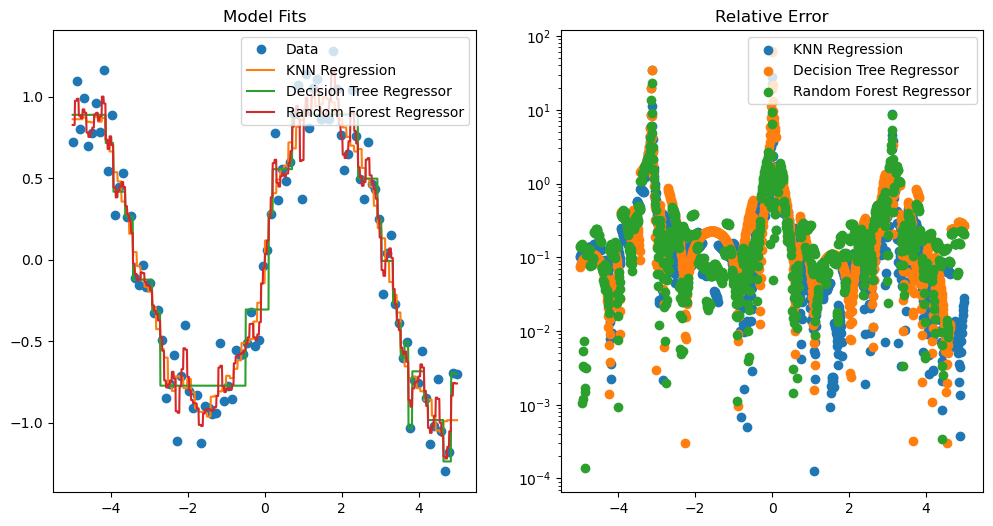

In [17]:
def generate_data(X, f, noise):
    return [f(x) + np.random.normal(loc=0, scale=noise) for x in X]

def plot_error(ax, X, Y, fits, model_names):
    for i in range(len(model_names)):
        ax.scatter(X, np.abs((Y-fits[i])/Y), label=model_names[i])
    ax.set_yscale("log")
    ax.legend(loc="upper right")

def generate_graphs(model_names, f_name, f, X, Y, X1, fits):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].set_title("Model Fits")
    axes[0].plot(X, Y, 'o', label="Data")
    for i in range(len(model_names)):
        axes[0].plot(X1, fits[i], label=model_names[i])
    axes[0].legend(loc="upper right")
    
    axes[1].set_title("Relative Error")
    plot_error(axes[1], X1, f(X1), fits, model_names)

    
start = -5
end = 5
gran1 = 100
gran2 = 1000
X = np.linspace(start, end, gran1)
f = lambda x: np.sin(x)
Y = generate_data(X, f, 0.2)
X1 = np.linspace(start, end, gran2)

## K nearest neighbor regression
startTime = time.time()
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X.reshape(-1, 1), Y)
endTime = time.time()
predKNN = knn.predict(X1.reshape(-1, 1))
print(f"KNN runtime: {endTime - startTime:.4f} seconds")

## Decision Tree Regressor
startTime = time.time()
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X.reshape(-1, 1), Y)
endTime = time.time()
predTree = tree.predict(X1.reshape(-1, 1))
print(f"Decision Tree runtime: {endTime - startTime:.4f} seconds")

## Random Forest Regressor
startTime = time.time()
forest = RandomForestRegressor(n_estimators=1000, max_depth=10)
forest.fit(X.reshape(-1, 1), Y)
endTime = time.time()
predForest = forest.predict(X1.reshape(-1, 1))
print(f"Random Forest runtime: {endTime - startTime:.4f} seconds")


generate_graphs(["KNN Regression", "Decision Tree Regressor", "Random Forest Regressor"], "sin(x)", f, X, Y, X1, [predKNN, predTree, predForest])
# generate_graphs(["KNN Regression"], "sin(x)", f, X, Y, X1, [predKNN])
# generate_graphs(["Decision Tree Regressor"], "sin(x)", f, X, Y, X1, [predTree])
# generate_graphs(["Random Forest Regressor"], "sin(x)", f, X, Y, X1, [predForest])

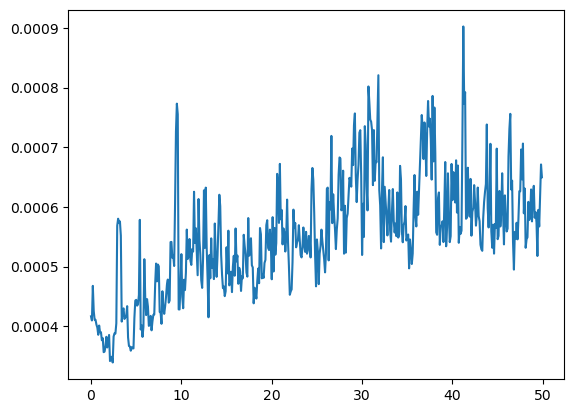

In [62]:
def generate_graphs_nl(model_names, f_name, f, X, Y, X1, fits, params):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].set_title("Model Fits")
    axes[0].plot(X, Y, 'o', label="Data")
    for i in range(len(model_names)):
        axes[0].plot(X1, fits[i], label=model_names[i])
    axes[0].legend(loc="upper right")
    
    axes[1].set_title("Relative Error")
    plot_error(axes[1], X1, f(X1, *params), fits, model_names)
    
def residual(params, x, y):
    return y - f(x, *params)

start = -5
end = 5
gran1 = 100
gran2 = 1000
X = np.linspace(start, end, gran1)
params = (2.5, 1.3)
f = lambda x, a, b: a * np.sin(-b * x)# + c
X1 = np.linspace(start, end, gran2)

## Scipy Curve Fit


# generate_graphs_nl(["Scipy Curve Fit"], "sin(x)", f, X, Y, X1, [predCF], params)
np.save('x.npy', X)
np.save('y.npy', Y)

times = []
sses = []
coef_error = []
noise = np.arange(0, 50, 0.1)
iterations = 200
for n in noise:
    times1 = []
    sses1 = []
    coef_error1 = []
    for i in range(iterations):
        Y = f(X, *params) + np.random.normal(loc=0, scale=n, size=len(X))

        startTime = time.time()
        popt, pcov = curve_fit(f, X, Y, p0=[1, 1])
        endTime = time.time()
        predCF = f(X1, *popt)
        sses1.append(np.sum((f(X1, *params) - predCF) ** 2))
        times1.append(endTime - startTime)
        coef_error1.append(np.linalg.norm(params - popt))
    times.append(np.mean(times1))
    sses.append(np.mean(sses1))
    coef_error.append(np.mean(coef_error1))

plt.plot(noise, times)
    

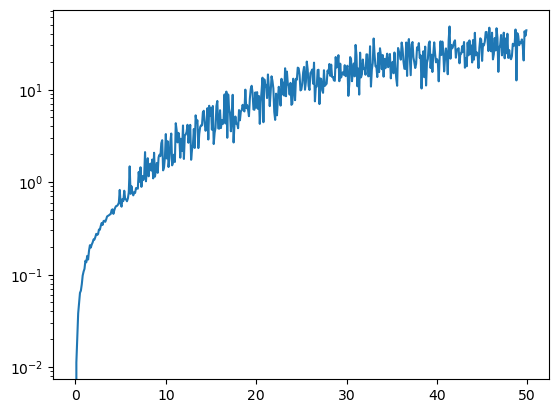

In [63]:
plt.yscale('log')
# plt.xscale('log')
plt.plot(noise, coef_error)

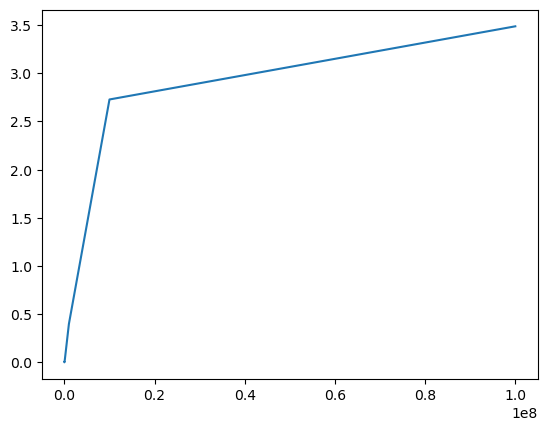

In [68]:
start = 0
end = 1000000
gran1 = 10000000
X = np.linspace(start, end, gran1)
params = (2.5, 1.3)
f = lambda x, a, b: a * np.sin(-b * x)# + c
iterations = 10

times = []
sses = []
noise = 10
lengths = np.arange(10000, gran1, 10000)
for i in range(1,9):
    times1 = []
    sses1 = []
    X1 = X[:(10**i)]
    for i in range(iterations):
        Y = f(X1, *params) + np.random.normal(loc=0, scale=noise, size=len(X1))

        startTime = time.monotonic()
        popt, pcov = curve_fit(f, X1, Y, p0=[1, 1])
        endTime = time.monotonic()
        # predCF = f(X1, *popt)
        # sses1.append(np.sum((f(X1, *params) - predCF) ** 2))
        times1.append(endTime - startTime)
    times.append(np.mean(times1))
    # sses.append(np.mean(sses1))

plt.plot([10**i for i in range(1,9)], times)
    

Text(0.5, 1.0, 'Time vs Size')

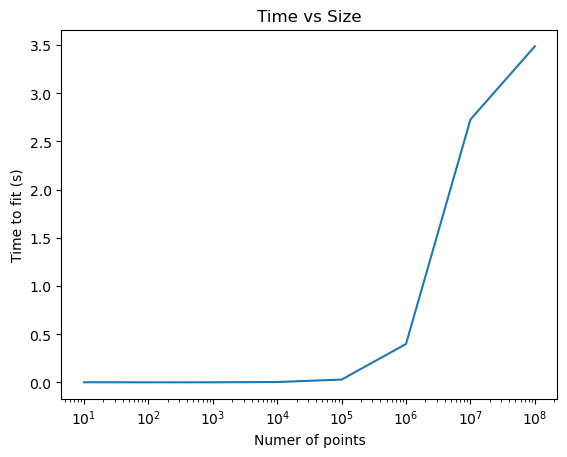

In [72]:
plt.xscale('log')
plt.plot([10**i for i in range(1,9)], times)
plt.xlabel('Numer of points')
plt.ylabel('Time to fit (s)')
plt.title('Time vs Size')

In [ ]:
## Scipy Least Squares
# ls_params = [1,1,1]
# startTime = time.time()
# result = least_squares(residual, ls_params,args=(X,Y))
# endTime = time.time()
# predLS = f(X1, *result.x)
# print(f"Scipy Least Squares: {endTime - startTime:.4f} seconds")

## Statsmodel LS
# model = sm.GLS(Y, sm.add_constant(func(X, *np.ones(3))))
# results = model.fit()
# print(results.params)
# popt = results.params
# predSLS = f(X1, *popt)